In [1]:
import numpy as np
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('../data/male_players.csv', low_memory=False)
print(list(data.columns))
# print(data.head)
fc_24 = data[data['fifa_version'] >= 24]

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed'

In [3]:
def get_players_by_country(country, data):
    players_by_country = data[data['nationality_name'] == country]
    top_players = players_by_country.nlargest(30, 'overall')
    return top_players[['short_name', 'overall', 'potential', 'player_positions']]

get_players_by_country('Argentina', fc_24)


,short_name,overall,potential,player_positions
3,L. Messi,90,90,"CF, CAM"
28,L. Martínez,87,90,ST
57,P. Dybala,86,86,"CF, CAM"
80,E. Martínez,85,85,GK
90,M. Acuña,85,85,"LB, LM"
98,L. Martínez,84,87,CB
137,R. De Paul,84,84,CM
144,E. Fernández,83,89,"CM, CDM"
159,G. Rodríguez,83,84,CDM
170,Á. Di María,83,83,"CF, RW, RM"


In [4]:
def get_players_by_team(x, data):
    players = data[data['club_name'] == x][['short_name','age','value_eur','club_jersey_number','club_position','nationality_name','overall','club_contract_valid_until_year']]
    players['value_eur'] = players['value_eur'].apply(lambda x: f"{x:,.0f} €")
    return players

get_players_by_team('Inter Miami', fc_24)

,short_name,age,value_eur,club_jersey_number,club_position,nationality_name,overall,club_contract_valid_until_year
3,L. Messi,36,"41,000,000 €",10.0,RF,Argentina,90,2025.0
172,Jordi Alba,34,"13,500,000 €",18.0,LB,Spain,83,2024.0
173,Sergio Busquets,34,"12,500,000 €",5.0,CM,Spain,83,2025.0
1408,F. Farías,20,"12,500,000 €",11.0,LF,Argentina,75,2026.0
1676,J. Martínez,30,"5,500,000 €",17.0,ST,Venezuela,75,2023.0
2853,Gregore,29,"2,600,000 €",26.0,RES,Brazil,73,2027.0
3329,S. Kryvtsov,32,"1,500,000 €",27.0,SUB,Ukraine,72,2024.0
3339,Jean Mota,29,"2,300,000 €",7.0,SUB,Brazil,72,2024.0
3522,F. Negri,28,"2,100,000 €",33.0,SUB,Argentina,72,2024.0
3833,K. Miller,26,"2,200,000 €",31.0,LCB,Canada,71,2024.0


In [5]:
def get_high_potential_players(threshold=5, data=fc_24):
    players_with_potential = data[(data['potential'] - data['overall'] >= threshold) & (data['overall'] > 65) & (data['potential'] > 80) & (data['age'] < 21)]
    players_with_potential['value_eur'] = players_with_potential['value_eur'].apply(lambda x: f"{x:,.0f} €")
    top_players = players_with_potential.nlargest(40, 'potential')
    return top_players[['short_name', 'overall', 'potential', 'player_positions', 'age', 'value_eur', 'club_contract_valid_until_year']]

get_high_potential_players(10)


C:\Users\flavi\AppData\Local\Temp\ipykernel_9132\3310629319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_with_potential['value_eur'] = players_with_potential['value_eur'].apply(lambda x: f"{x:,.0f} €")


,short_name,overall,potential,player_positions,age,value_eur,club_contract_valid_until_year
485,X. Simons,79,89,"CAM, LW, RW",20,"38,500,000 €",2024.0
1083,R. Højlund,76,89,ST,20,"18,000,000 €",2028.0
650,Ansu Fati,78,88,"LW, ST",20,"31,000,000 €",2024.0
651,E. Wahi,78,88,"ST, LM",20,"31,000,000 €",2028.0
652,António Silva,78,88,CB,19,"28,500,000 €",2027.0
845,A. Güler,77,88,"CAM, CM, RW",18,"22,000,000 €",2029.0
1395,Alejandro Garnacho,75,88,"LW, LM",19,"13,500,000 €",2028.0
1396,F. Miretti,75,88,"CM, CAM",19,"13,500,000 €",2027.0
1397,W. Zaïre-Emery,75,88,"CM, CDM",17,"13,000,000 €",2025.0
846,Y. Moukoko,77,87,ST,18,"22,500,000 €",2026.0


In [6]:
def list_all_positions():
    all_positions = data['player_positions'].str.split(', ', expand=True).stack().unique()
    return sorted(all_positions)

def get_players_by_position(pos, data):
    players = data[data['player_positions'] == pos]
    return players[['short_name', 'overall', 'potential', 'player_positions']]

postions = list_all_positions()
print(postions)
# pos = input('Select player position:\n')
get_players_by_position("ST", fc_24)

['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST']


,short_name,overall,potential,player_positions
1,E. Haaland,91,94,ST
5,R. Lewandowski,90,90,ST
7,H. Kane,90,90,ST
18,V. Osimhen,88,91,ST
28,L. Martínez,87,90,ST
...,...,...,...,...
18284,Tang Xu,49,57,ST
18308,N. Barla,48,61,ST
18325,Leng Jixuan,48,54,ST
18329,He Youzu,48,53,ST


In [7]:
def get_best_players(position, data, top_n=10):
    valid_positions = list_all_positions()
    if position not in valid_positions:
        raise ValueError(f"Invalid position: {position}. Valid positions are {valid_positions}")
    players = data[data['player_positions'].str.contains(position)]
    players['value_eur'] = players['value_eur'].apply(lambda x: f"{x:,.0f} €")
    top_players = players.nlargest(top_n, 'overall')
    return top_players[['short_name', 'overall', 'potential', 'player_positions', 'value_eur']]

get_best_players('RWB', fc_24)


C:\Users\flavi\AppData\Local\Temp\ipykernel_9132\151650004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players['value_eur'] = players['value_eur'].apply(lambda x: f"{x:,.0f} €")


,short_name,overall,potential,player_positions,value_eur
105,A. Hakimi,84,86,"RB, RWB","50,500,000 €"
107,R. James,84,86,"RB, RWB","50,500,000 €"
149,J. Frimpong,83,88,"RWB, RM","52,000,000 €"
210,N. Molina,82,86,"RB, RWB, RM","39,500,000 €"
283,D. Calabria,81,84,"RB, RWB","31,000,000 €"
291,Pedro Porro,81,84,"RB, RWB","32,500,000 €"
307,D. Dumfries,81,82,"RWB, RM","27,000,000 €"
364,J. Clauss,81,81,"RWB, RM, RB","22,000,000 €"
368,Arnau Martínez,80,87,"RB, RWB","39,500,000 €"
434,M. Darmian,80,80,"CB, RWB, RM","10,000,000 €"


C:\Users\flavi\AppData\Local\Temp\ipykernel_9132\2756071523.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='player_positions', data=data_filtered, palette='dark', order=valid_positions)


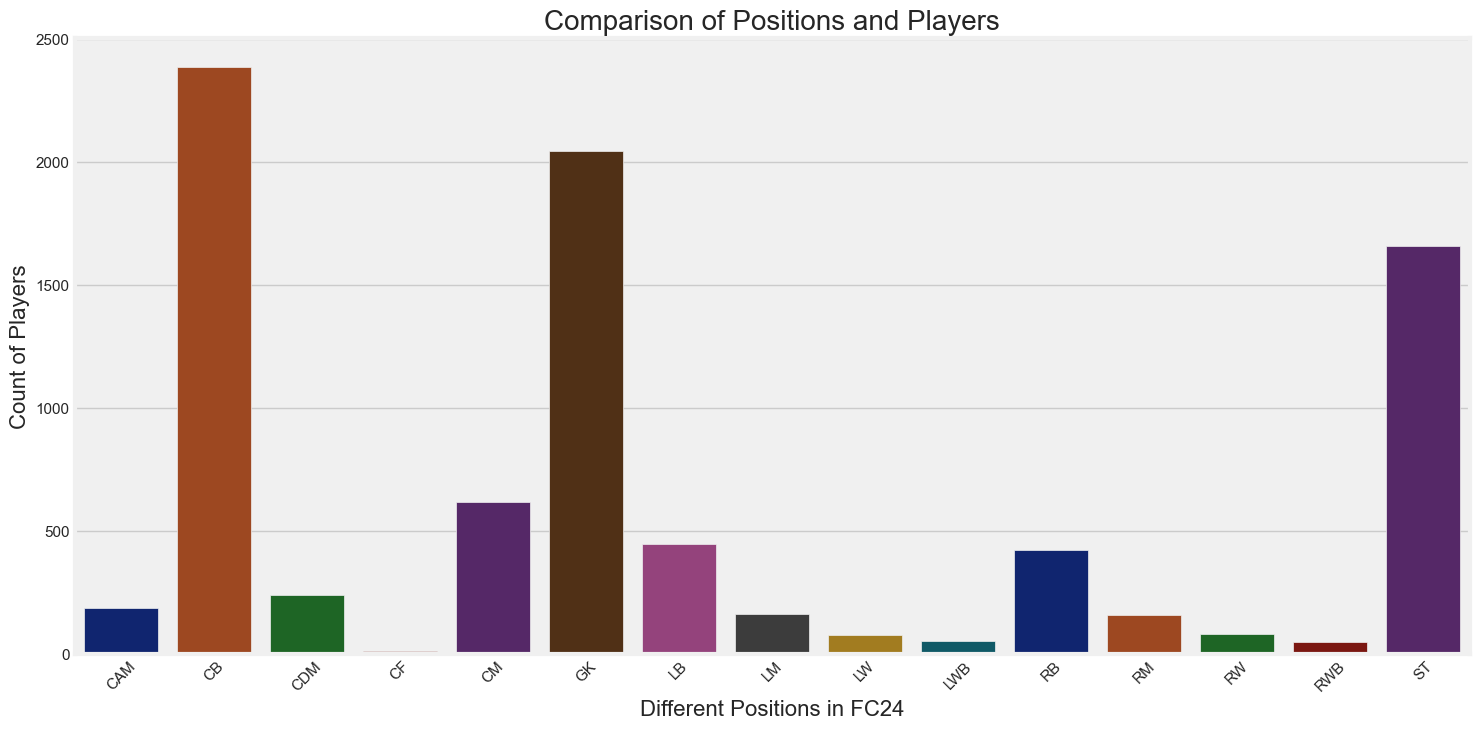

In [8]:
valid_positions = list_all_positions()
data_filtered = fc_24[fc_24['player_positions'].str.contains('|'.join(valid_positions))]

plt.figure(figsize=(18,8))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='player_positions', data=data_filtered, palette='dark', order=valid_positions) 
ax.set_xlabel('Different Positions in FC24', fontsize=16)
ax.set_ylabel('Count of Players', fontsize=16)
ax.set_title('Comparison of Positions and Players', fontsize=20)
plt.xticks(rotation=45)
plt.show()


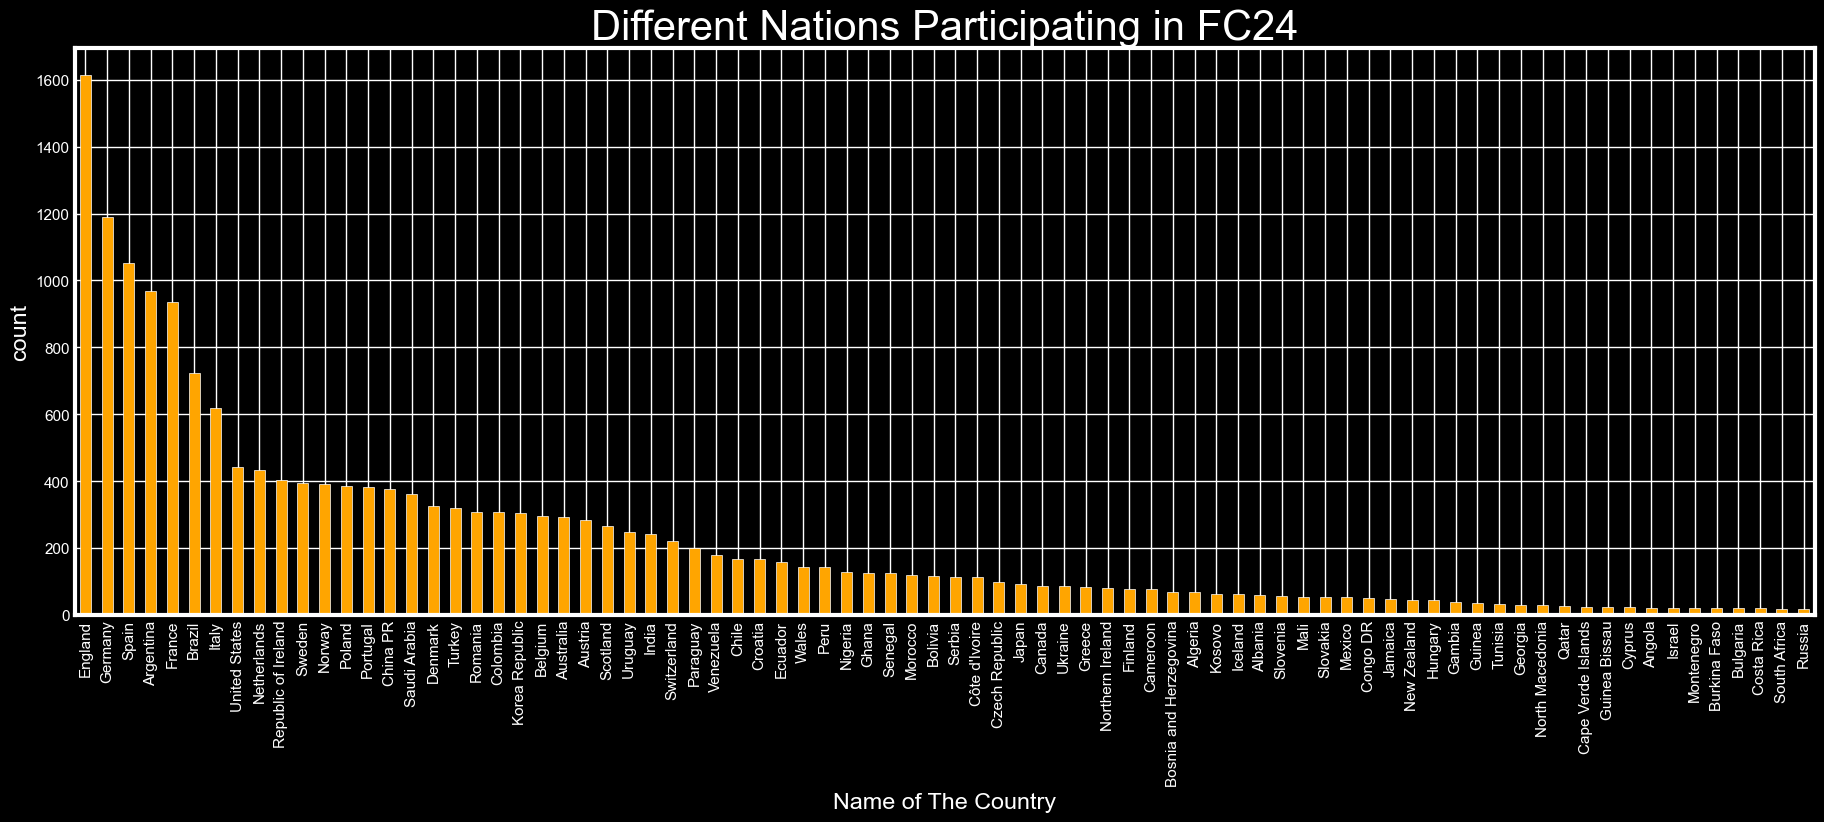

In [9]:
plt.style.use('dark_background')
fc_24['nationality_name'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FC24', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

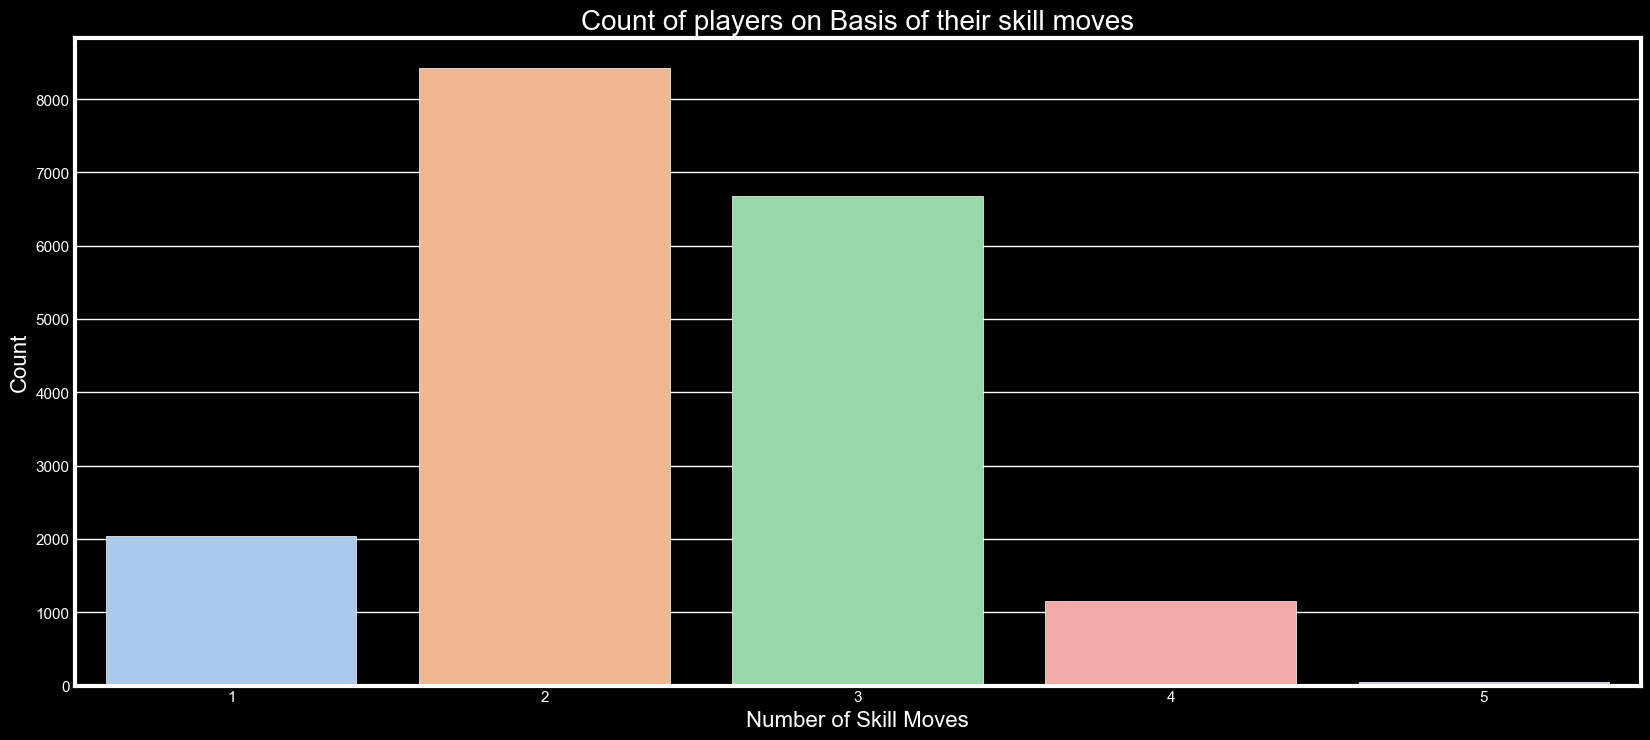

In [10]:
plt.figure(figsize=(18,8))
ax = sns.countplot(x='skill_moves', data=fc_24, hue='skill_moves', palette='pastel', legend=False)
ax.set_title('Count of players on Basis of their skill moves', fontsize=20)
ax.set_xlabel('Number of Skill Moves', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

plt.show()

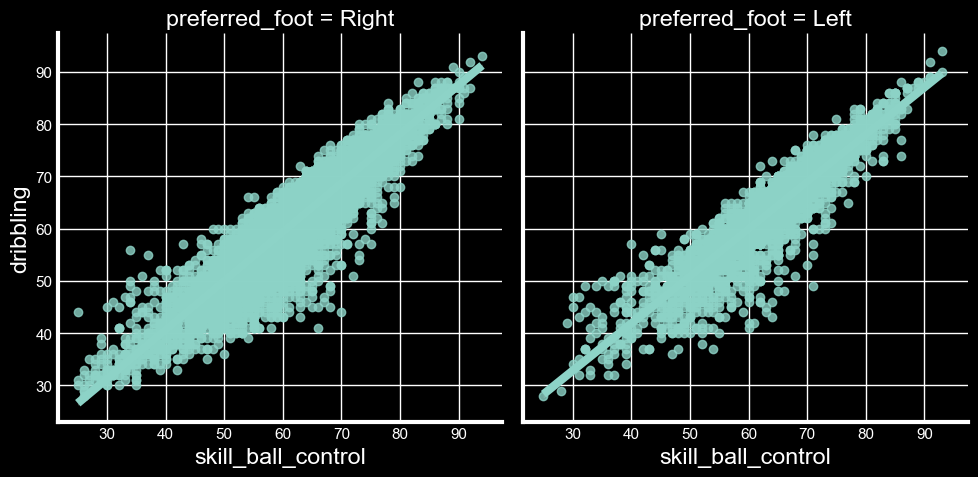

In [11]:
sns.lmplot(x = 'skill_ball_control', y = 'dribbling', data = fc_24, col = 'preferred_foot')
plt.show()